# Credit Card Fraud Detection

This notebook explores the credit card fraud detection dataset, examining its structure, distributions, correlations, and anomalies.

Data source - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## 1. Import Required Libraries

Import necessary libraries for data exploration and visualization.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the Dataset

Load the credit card fraud detection dataset from the CSV file.

In [16]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (284807, 31)


## 3. Display Basic Dataset Information

Examine the structure of the dataset including column names, data types, and sample rows.

In [17]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("Column Names:")
print(df.columns.tolist())
print("\n" + "="*80 + "\n")

print("First 5 Rows:")
print(df.head())
print("\n" + "="*80 + "\n")

print("Last 5 Rows:")
print(df.tail())

Dataset Shape:
Rows: 284807, Columns: 31

Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


First 5 Rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846

## 4. Explore Data Types and Missing Values

Check the data types and identify any missing values in the dataset.

In [18]:
# Check for all unique values in the 'Class' column
print("\nUnique values in 'Class' column:")
print(df['Class'].unique())

# Check value counts for the 'Class' column
print("\nValue counts for 'Class' column:")
print(df['Class'].value_counts())


Unique values in 'Class' column:
[0 1]

Value counts for 'Class' column:
Class
0    284315
1       492
Name: count, dtype: int64


In [19]:
print("Data Types:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

print("Missing Values:")
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\n✓ No missing values detected!")
else:
    print(f"\n✗ Total missing values: {missing.sum()}")
print("\n" + "="*80 + "\n")

print("Dataset Info:")
df.info()

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

✓ No missing

## 5. Generate Descriptive Statistics

Calculate and analyze descriptive statistics for all numerical features.

In [20]:
print("Descriptive Statistics:")
print(df.describe())
print("\n" + "="*80 + "\n")

print("Additional Statistics:")
print(f"Skewness:\n{df.skew()}\n")
print(f"Kurtosis:\n{df.kurtosis()}")

Descriptive Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+0

## 6. Visualize Data Distributions

Create visualizations to explore the distribution of numerical features.

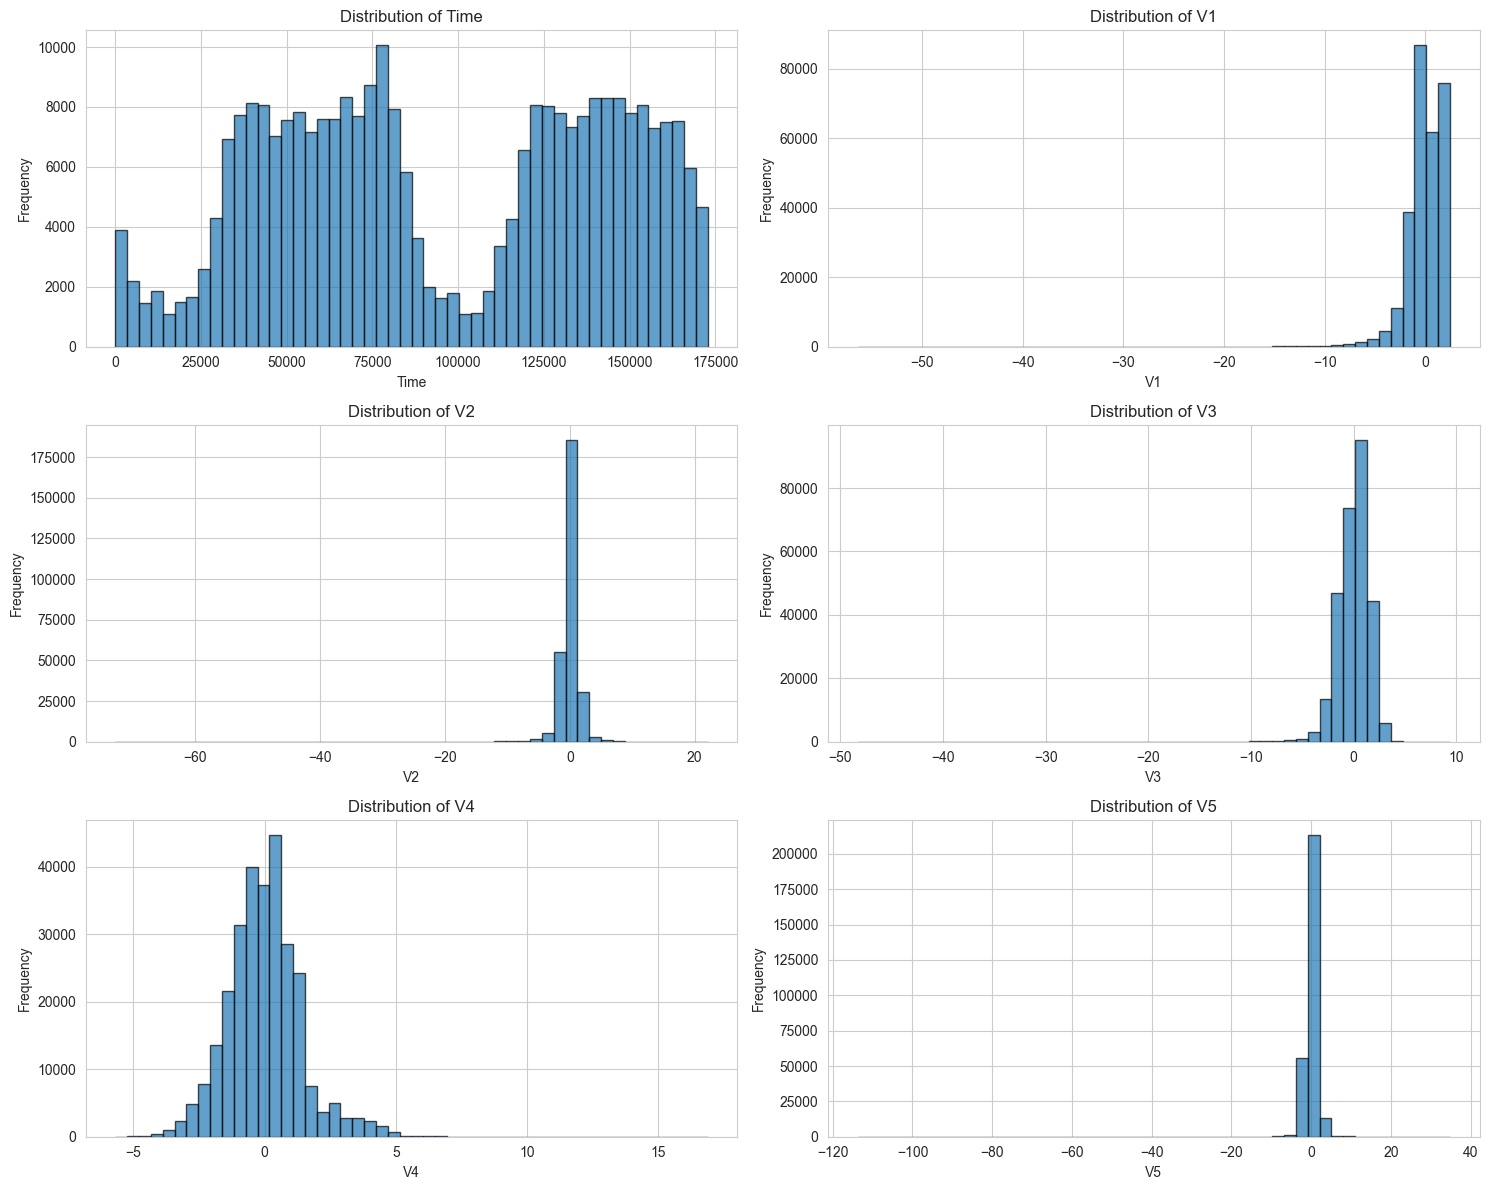

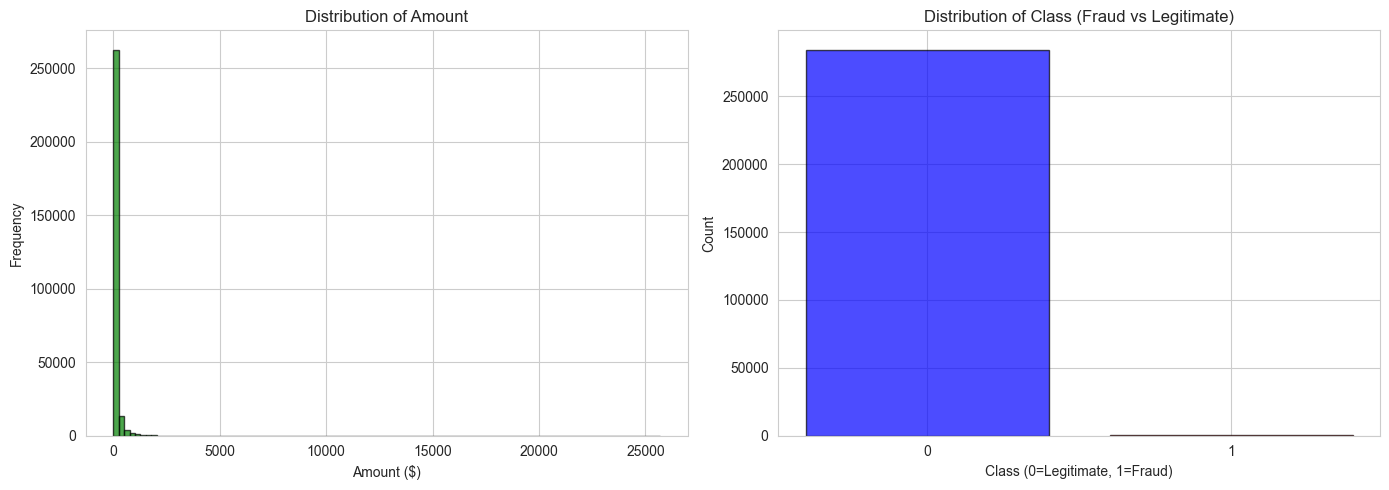


Box plots for outlier detection (first 6 features):


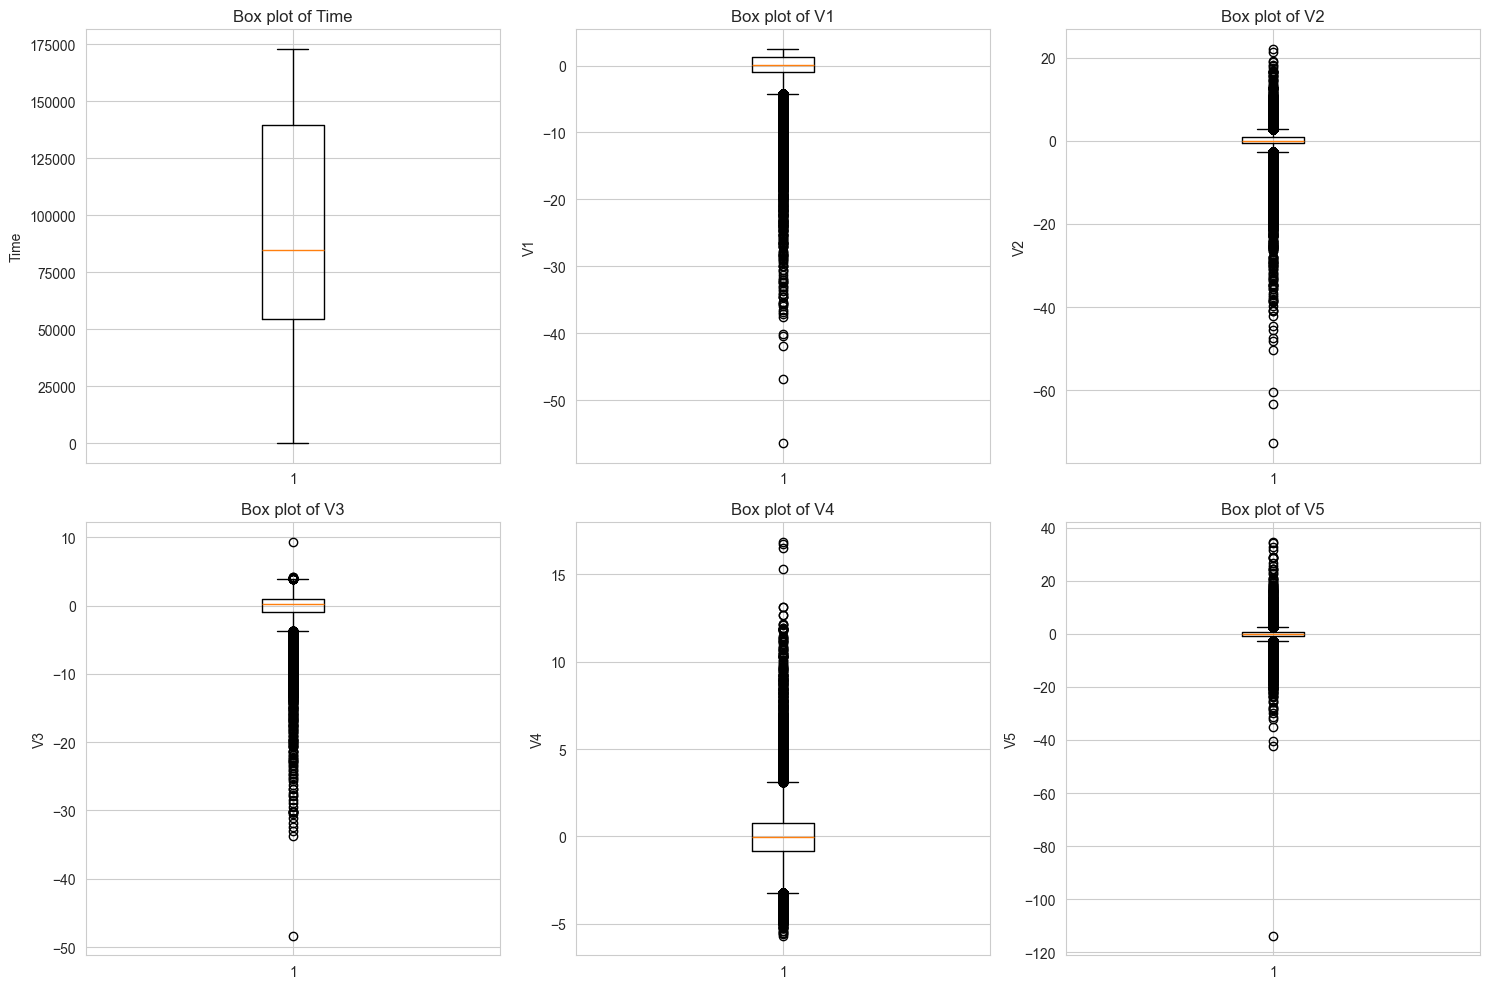

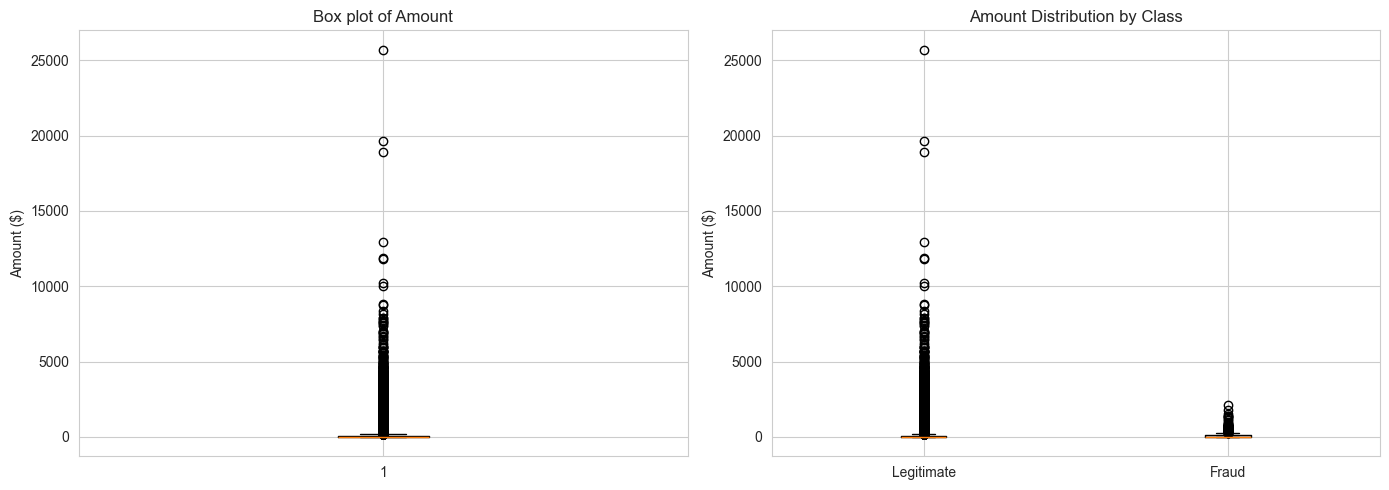

In [21]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Visualize the distribution of a few key features (first 6)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:6]):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize Amount and Class distributions separately
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount distribution
axes[0].hist(df['Amount'], bins=100, edgecolor='black', alpha=0.7, color='green')
axes[0].set_title('Distribution of Amount')
axes[0].set_xlabel('Amount ($)')
axes[0].set_ylabel('Frequency')

# Class distribution (fraud vs legitimate)
class_counts = df['Class'].value_counts().sort_index()
axes[1].bar(class_counts.index, class_counts.values, color=['blue', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Class (Fraud vs Legitimate)')
axes[1].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])

plt.tight_layout()
plt.show()

# Box plots for detecting outliers (first 6)
print("\nBox plots for outlier detection (first 6 features):")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:6]):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Box plot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# Box plots for Amount and Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount box plot
axes[0].boxplot(df['Amount'])
axes[0].set_title('Box plot of Amount')
axes[0].set_ylabel('Amount ($)')

# Class as box plot (showing distribution by fraud status)
legit_amounts = df[df['Class'] == 0]['Amount']
fraud_amounts = df[df['Class'] == 1]['Amount']
axes[1].boxplot([legit_amounts, fraud_amounts], tick_labels=['Legitimate', 'Fraud'])
axes[1].set_title('Amount Distribution by Class')
axes[1].set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

## 7. Analyze Correlations

Compute correlation matrices and visualize relationships between variables.

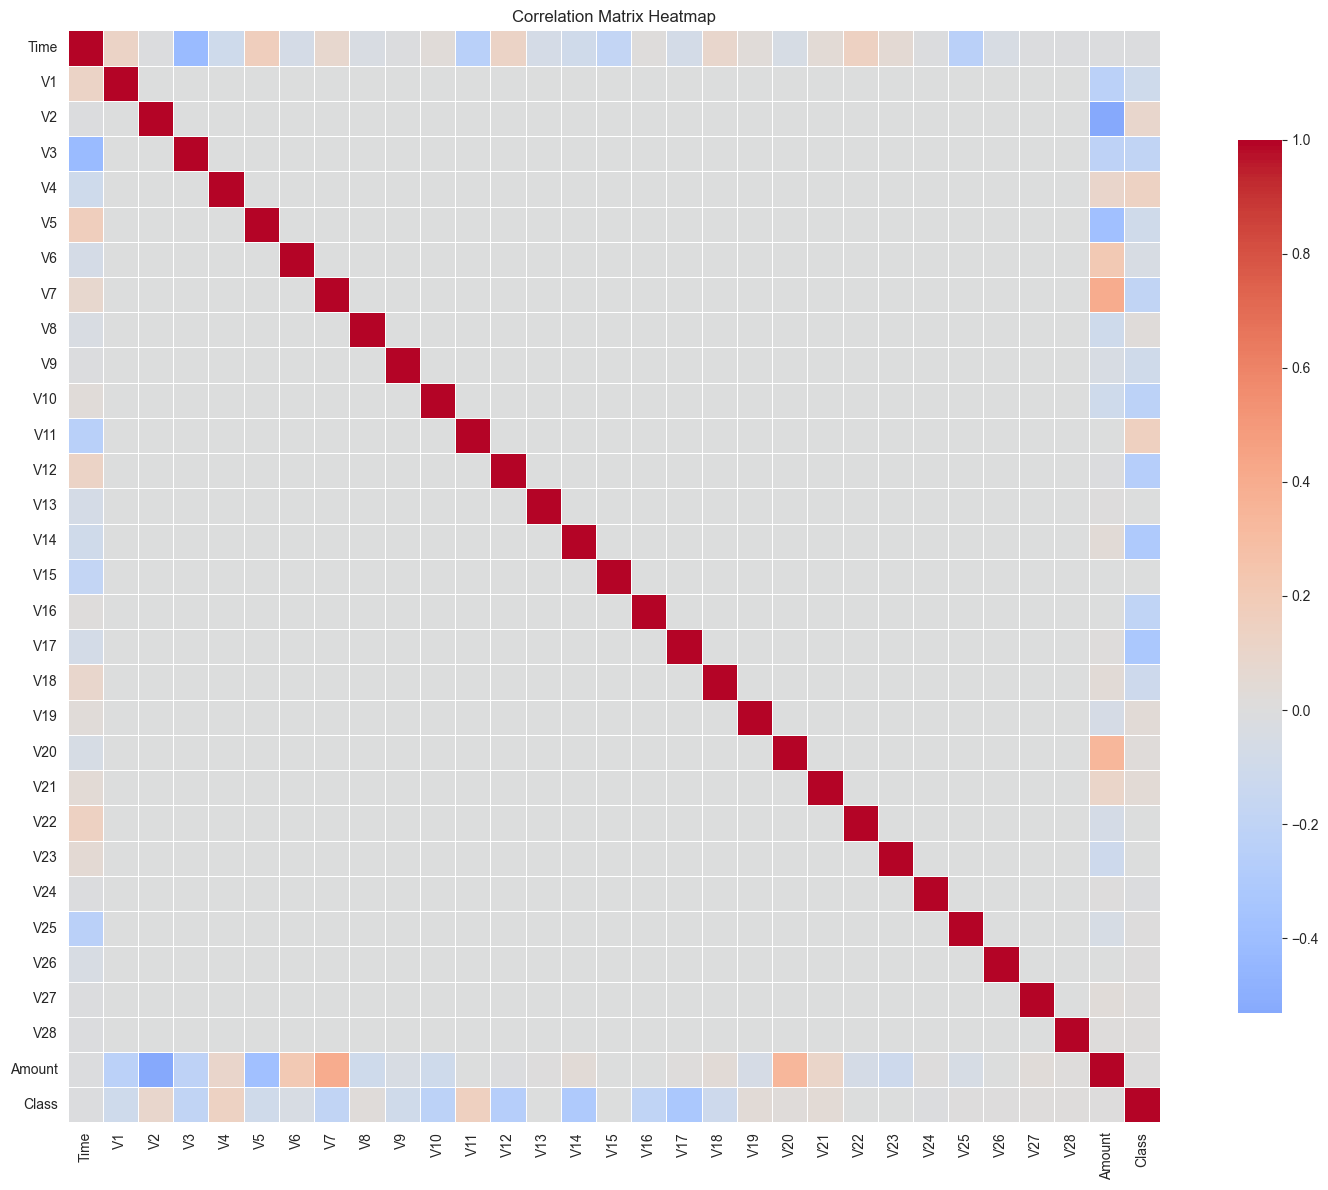


Correlation with 'Class' (Target Variable):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features (if any specific column like 'Class' exists)
if 'Class' in df.columns:
    print("\nCorrelation with 'Class' (Target Variable):")
    class_corr = correlation_matrix['Class'].sort_values(ascending=False)
    print(class_corr)


AMOUNT vs CLASS ANALYSIS

Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


Legitimate Transactions: 284315
  Average Amount: $88.29
  Median Amount: $22.00
  Min Amount: $0.00
  Max Amount: $25691.16

Fraud Transactions: 492
  Average Amount: $122.21
  Median Amount: $9.25
  Min Amount: $0.00
  Max Amount: $2125.87

Fraud Rate: 0.17%


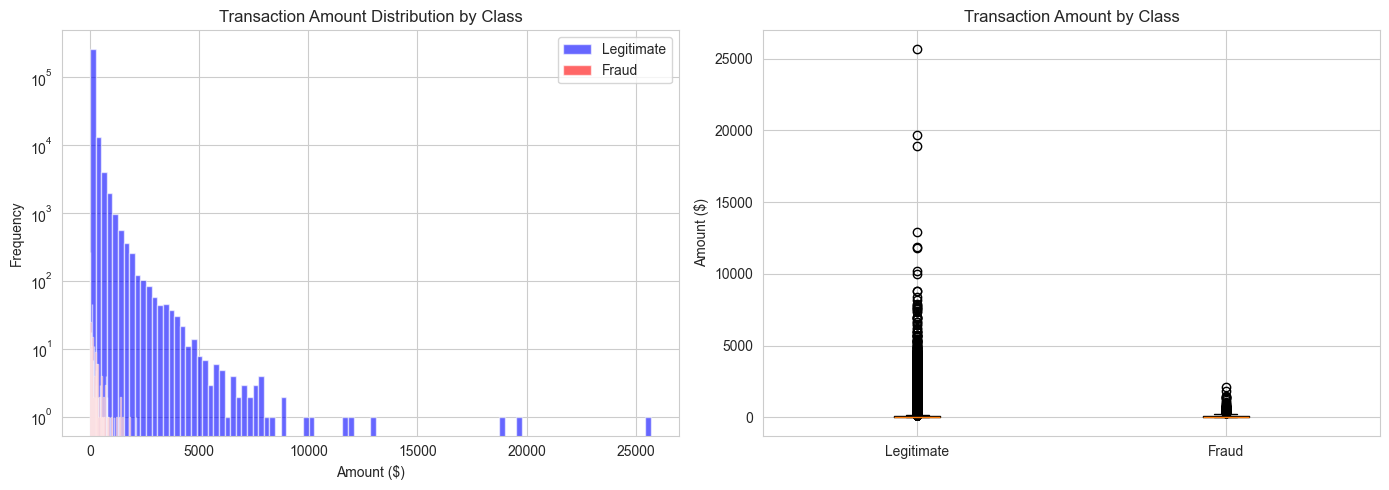

In [23]:

# Additional analysis: Amount vs Class relationship
print("\n" + "="*80)
print("AMOUNT vs CLASS ANALYSIS")
print("="*80 + "\n")

# Statistics by class
print("Amount Statistics by Class:")
print(df.groupby('Class')['Amount'].describe())
print("\n")

# Fraud detection rate and average amounts
legit_transactions = df[df['Class'] == 0]
fraud_transactions = df[df['Class'] == 1]

print(f"Legitimate Transactions: {len(legit_transactions)}")
print(f"  Average Amount: ${legit_transactions['Amount'].mean():.2f}")
print(f"  Median Amount: ${legit_transactions['Amount'].median():.2f}")
print(f"  Min Amount: ${legit_transactions['Amount'].min():.2f}")
print(f"  Max Amount: ${legit_transactions['Amount'].max():.2f}")

print(f"\nFraud Transactions: {len(fraud_transactions)}")
print(f"  Average Amount: ${fraud_transactions['Amount'].mean():.2f}")
print(f"  Median Amount: ${fraud_transactions['Amount'].median():.2f}")
print(f"  Min Amount: ${fraud_transactions['Amount'].min():.2f}")
print(f"  Max Amount: ${fraud_transactions['Amount'].max():.2f}")

print(f"\nFraud Rate: {(len(fraud_transactions) / len(df) * 100):.2f}%")

# Visualize Amount distribution by Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot comparison
df[df['Class'] == 0]['Amount'].hist(bins=100, alpha=0.6, label='Legitimate', ax=axes[0], color='blue')
df[df['Class'] == 1]['Amount'].hist(bins=100, alpha=0.6, label='Fraud', ax=axes[0], color='red')
axes[0].set_title('Transaction Amount Distribution by Class')
axes[0].set_xlabel('Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].set_yscale('log')

# Box plot
axes[1].boxplot([df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']], 
                tick_labels=['Legitimate', 'Fraud'])
axes[1].set_title('Transaction Amount by Class')
axes[1].set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

## 8. Identify Outliers

Detect and analyze outliers using statistical methods.

Outlier Detection using IQR Method:
V1: 7062 outliers detected
V2: 13526 outliers detected
V3: 3363 outliers detected
V4: 11148 outliers detected
V5: 12295 outliers detected
V6: 22965 outliers detected
V7: 8948 outliers detected
V8: 24134 outliers detected
V9: 8283 outliers detected
V10: 9496 outliers detected
V11: 780 outliers detected
V12: 15348 outliers detected
V13: 3368 outliers detected
V14: 14149 outliers detected
V15: 2894 outliers detected
V16: 8184 outliers detected
V17: 7420 outliers detected
V18: 7533 outliers detected
V19: 10205 outliers detected
V20: 27770 outliers detected
V21: 14497 outliers detected
V22: 1317 outliers detected
V23: 18541 outliers detected
V24: 4774 outliers detected
V25: 5367 outliers detected
V26: 5596 outliers detected
V27: 39163 outliers detected
V28: 30342 outliers detected
Amount: 31904 outliers detected
Class: 492 outliers detected

Total outliers detected: 370864


Outlier Detection using Z-score Method (|Z| > 3):
V1        3701
V2        4318
V

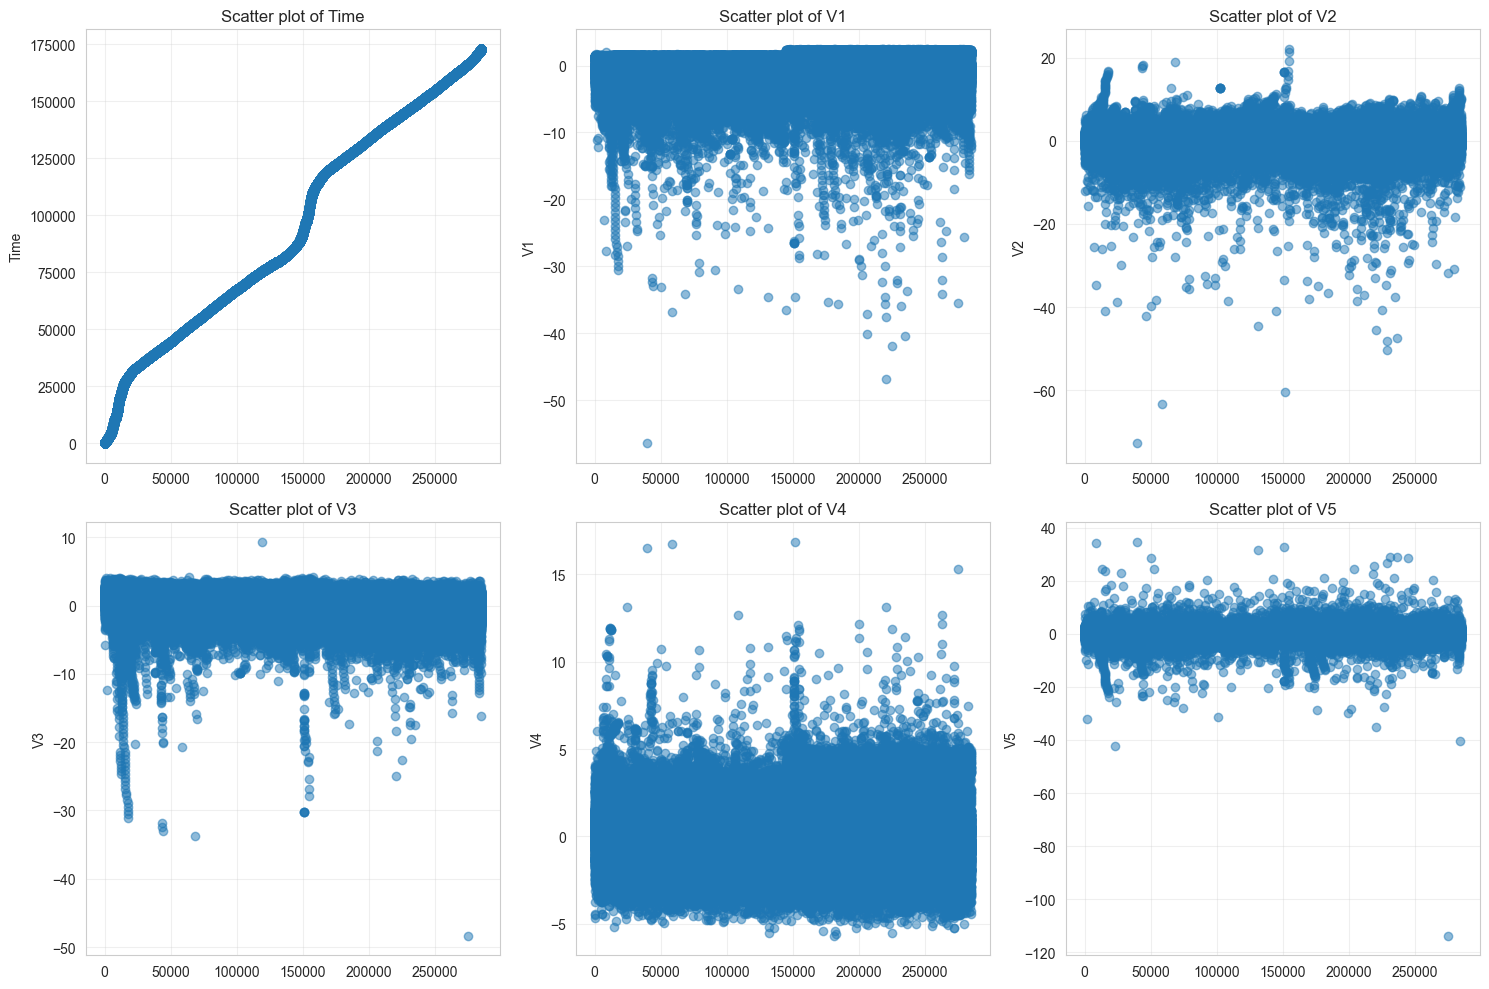

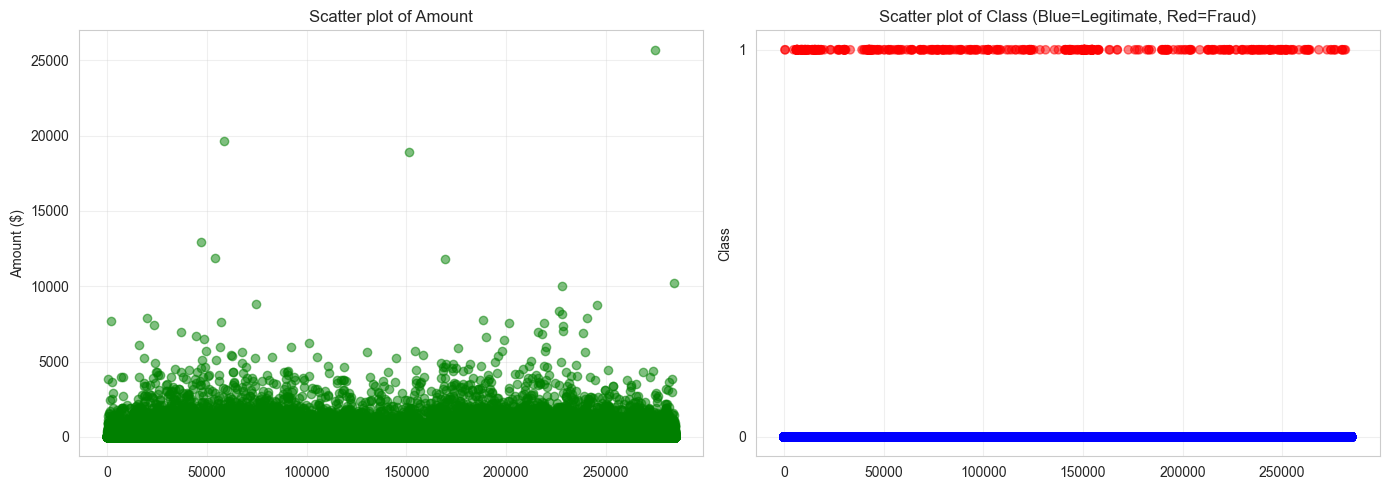

In [24]:
# Method 1: IQR (Interquartile Range) Method
print("Outlier Detection using IQR Method:")
print("="*80)

outlier_count = 0
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"{col}: {outliers} outliers detected")
        outlier_count += outliers

print(f"\nTotal outliers detected: {outlier_count}\n")
print("="*80 + "\n")

# Method 2: Z-score method (using NumPy)
print("Outlier Detection using Z-score Method (|Z| > 3):")
print("="*80)

# Calculate z-scores using NumPy
numeric_data = df.select_dtypes(include=[np.number])
z_scores = np.abs((numeric_data - numeric_data.mean()) / numeric_data.std())
outliers_zscore = (z_scores > 3).sum(axis=0)
print(outliers_zscore[outliers_zscore > 0])

# Visualize outliers for first 6 features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:6]):
    axes[idx].scatter(range(len(df)), df[col], alpha=0.5)
    axes[idx].set_title(f'Scatter plot of {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize outliers for Amount and Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount scatter plot
axes[0].scatter(range(len(df)), df['Amount'], alpha=0.5, color='green')
axes[0].set_title('Scatter plot of Amount')
axes[0].set_ylabel('Amount ($)')
axes[0].grid(True, alpha=0.3)

# Class scatter plot (color-coded by fraud status)
colors = ['blue' if x == 0 else 'red' for x in df['Class']]
axes[1].scatter(range(len(df)), df['Class'], c=colors, alpha=0.5)
axes[1].set_title('Scatter plot of Class (Blue=Legitimate, Red=Fraud)')
axes[1].set_ylabel('Class')
axes[1].set_yticks([0, 1])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()